# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

* a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)  
* linear regression model prediction equation:  
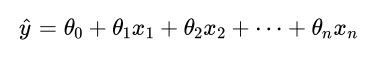  
* linear regression model prediction (vectorized form):  
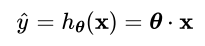

#### Generating linear-looking random data with y = 4 + 3x1 + Gaussian noise

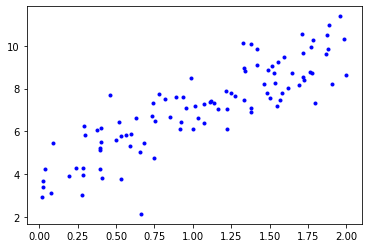

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")

#### Computing theta-hat(theta best) using Normal Equation:  
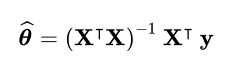

In [3]:
X_b = np.c_[np.ones((100, 1)), X]         # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

##### Actual **theta(0)**=4 & **theta(1)**=3 but the noise made it impossible to recover the exact parameters

In [4]:
theta_best

array([[3.86436143],
       [3.07654205]])

#### Making prdictions using theta-hat

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]      # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86436143],
       [10.01744553]])

#### Plotting the model's prediction

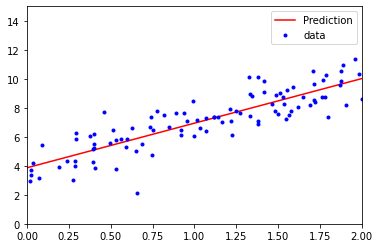

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(('Prediction', 'data'))

#### Performing Linear Regression using **Sklearn**

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86436143]), array([[3.07654205]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.86436143],
       [10.01744553]])

#### Numpy's least square method to compute Linear Regression using `np.linalg.lstsq()`
 
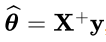

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86436143],
       [3.07654205]])

#### Applying Pseudoinverse directly using `np.linalg.pinv()`  
* pseudoinverse is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix **X** into the matrix multiplication of three matrices **U Σ V⊺**

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.86436143],
       [3.07654205]])

# Gradient Descent
* it is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems  
*  general idea of *Gradient Descent* is to tweak parameters iteratively in order to minimize a cost
function

#### Batch Gradient Descent implementation

In [12]:
eta = 0.1                       # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)    # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

#### Value of **theta** is same as of Normal Equation or SVD

In [13]:
theta

array([[3.86436143],
       [3.07654205]])

In [14]:
X_new_b.dot(theta)

array([[ 3.86436143],
       [10.01744553]])

#### Initial 10 steps of Gradient Descent with 3 differet learning rates(eta)

In [17]:
# this code block is from: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

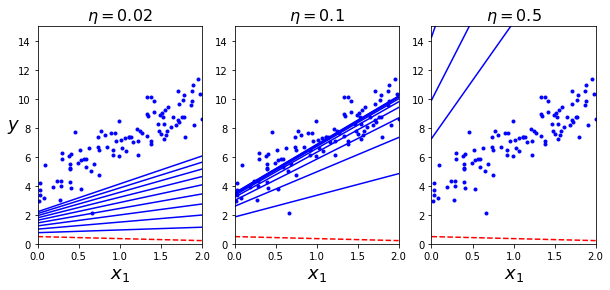

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


#### Algorithm preparation

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

#### Stochastic Gradient Descent implementation

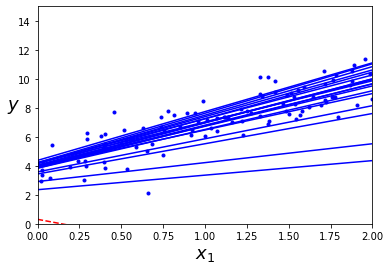

In [21]:
n_epochs = 50
t0, t1 = 5, 50                                      # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)                        # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)   
            style = "b-" if i > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)         

plt.plot(X, y, "b.")                         
plt.xlabel("$x_1$", fontsize=18)             
plt.ylabel("$y$", rotation=0, fontsize=18)   
plt.axis([0, 2, 0, 15])                      
plt.show()                                   

#### Value of **theta**

In [22]:
theta

array([[3.89263838],
       [3.04916767]])

#### `SGDRegressor` in linear_model module of scikit-learn   

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

#### SGD intercept and Coffiecient

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.78500336]), array([2.99222124]))